In [111]:
#Program to plot  a hyperbola
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from coeffs import *
#if using termux
#import subprocess
#import shlex
#end if

In [112]:
#Given hyperbola parameters
#Eqn : x.T@V@x = F
V = np.array(([25,0],[0,9]))
F = 225
O = np.array([0,0])

#Standard Eqn : y.T@D@y=1
#comparing these equations, get :  
#y = P.T@x/sqrt(F)
#P.T@V@P = D
#P.T@P = I

eigval,eigvec = LA.eig(V)
print(eigval)
print(eigvec)


D = np.diag(eigval)
E = eigvec
print("D=\n",D)
print("E=\n",E)

[25.  9.]
[[1. 0.]
 [0. 1.]]
D=
 [[25.  0.]
 [ 0.  9.]]
E=
 [[1. 0.]
 [0. 1.]]


In [113]:
#Generating points on the ellipse at origin
len = 100
theta = np.linspace(0,2*np.pi,len)
y = np.zeros((2,len))
y[0,:] = 1/eigval[0]*np.cos(theta)
y[1,:] = 1/eigval[1]*np.sin(theta)

#from p it is clear that point (a1*cos0, b1*sin0) a=3, b=4 0=60
a1 = 3; b1 = 5;
P = np.array([a1*np.cos(np.pi/3), b1*np.sin(np.pi/3)])
tp1 = np.array([0,b1/np.sin(np.pi/3)])
tp2 = np.array([a1/np.cos(np.pi/3),0])

In [116]:
#perpendiculars from focus to tangent
omat = np.array([[0,1],[-1,0]])
n = np.array([b1*np.cos(np.pi/3), a1*np.sin(np.pi/3)]) # direction vector of tangent
nt = np.dot(omat,n) #direction vector of normal
#print(nt)

x1 = np.array([(4*b1*np.cos(np.pi/3))/(-a1*np.sin(np.pi/3)), 0]) #x1 x2 point normal1 
x2 = np.array([0+1,4+1])
x3 = np.array([0, -4])                                          #x3 and x4 point on normal2
x4 = np.array([(4*b1*np.cos(np.pi/3))/(a1*np.sin(np.pi/3))+2, 0+2])

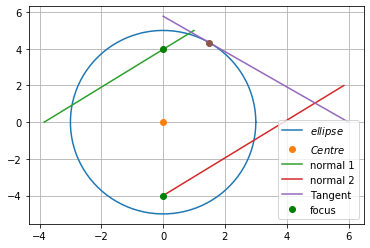

In [117]:
u = O[0]
v = O[1]
a = np.sqrt(D[1,1])
b = np.sqrt(D[0,0])
c = np.sqrt(np.power(b,2)-np.power(a,2))
f1 = np.array([0,c])
#print(f1)
f2 = np.array([0,-c])
X_Pf1 = line_gen(P,f1)
X_Pf2 = line_gen(P,f2)

X_tangent = line_gen(tp1,tp2)

#perpendiculars from focus
X_x1x2 = line_gen(x1,x2)
X_x3x4 = line_gen(x3,x4)


t = np.linspace(0, 2*np.pi, 100)
Ell = np.array([u+a*np.cos(t) , v+b*np.sin(t)])
plt.plot(Ell[0,:],Ell[1,:],label='$ellipse$')
plt.plot(O[0],O[1], 'o',label='$Centre$')

plt.plot(X_x1x2[0,:],X_x1x2[1,:],label='normal 1')
plt.plot(X_x3x4[0,:],X_x3x4[1,:],label='normal 2')
#plt.plot(X_Pf1[0,:],X_Pf1[1,:],label='OF1')
#plt.plot(X_Pf2[0,:],X_Pf2[1,:],label='OF2')
plt.plot(X_tangent[0,:],X_tangent[1,:],label='Tangent')
plt.plot(f1[0],f1[1],'o',color='g',label='focus')
plt.plot(f2[0],f2[1],'o',color='g')
plt.plot(P[0],P[1],'o')
plt.legend(loc="best")
plt.grid()